In [ ]:
! pip install emukit

In [ ]:
pip install --upgrade pyDOE

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18171 sha256=447de2de91505831f240b616e9bf0de4c83efd229be2590771d53692910da3f7
  Stored in directory: /root/.cache/pip/wheels/ce/b6/d7/c6b64746dba6433c593e471e0ac3acf4f36040456d1d160d17
Successfully built pyDOE


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign

In [ ]:
def x_normalizer(X, var_array):

    def max_min_scaler(x, x_max, x_min):
        return (x-x_min)/(x_max-x_min)
    x_norm = []
    for x in (X):
           x_norm.append([max_min_scaler(x[i],
                                         max(var_array[i]),
                                         min(var_array[i])) for i in range(len(x))])

    return x_norm

def x_denormalizer(x_norm, var_array):

    def max_min_rescaler(x, x_max, x_min):
        return x*(x_max-x_min)+x_min
    x_original = []
    for x in (x_norm):
           x_original.append([max_min_rescaler(x[i],
                                         max(var_array[i]),
                                         min(var_array[i])) for i in range(len(x))])

    return x_original

def get_closest_value(given_value, array_list):
    absolute_difference_function = lambda list_value : abs(list_value - given_value)
    closest_value = min(array_list, key=absolute_difference_function)
    return closest_value

def get_closest_array(suggested_x, var_list):
    modified_array = []
    for x in suggested_x:
        modified_array.append([get_closest_value(x[i], var_list[i]) for i in range(len(x))])
    return np.array(modified_array)

**Parameter Optimization Space**


*   Waveguide width: 1000 - 1800 nm (50 nm steps)
*   Waveguide height: 700 - 1000 nm (30 nm steps)
*   Radius: 50 - 200 $\mu m$ (15 $\mu m$ steps)
*   Loss: 10 - 200 dB/m (10 steps)
*   Coupling Coefficient: 0.001 - 0.5 (0.02 steps)








In [ ]:
w_min, w_max, w_step = [1000, 1800, 50] ## Unit: nm
w_var = np.arange(w_min, w_max+w_step, w_step)
w_num = len(w_var)

h_min, h_max, h_step = [700, 1000, 30] ## Unit: nm
h_var = np.arange(h_min, h_max+h_step, h_step)
h_num = len(h_var)

R_min, R_max, R_step = [50, 200, 15] ## Unit: micron
R_var = np.arange(R_min, R_max+R_step, R_step)
R_num = len(R_var)

Loss_min, Loss_max, Loss_step = [10, 200, 10] ## Unit: dB/m
Loss_var = np.arange(Loss_min, Loss_max+Loss_step, Loss_step)
Loss_num = len(Loss_var)

k_min, k_max, k_step = [0.001, 0.5, 0.02]
k_var = np.arange(k_min, k_max+k_step, k_step)
k_num = len(k_var)


var_array = [w_var, h_var, R_var, Loss_var, k_var]
x_labels = ['wg width [nm]',
            'wg height [nm]',
            'Radius [micron]',
            'Loss [dB/m]',
            'coupling coefficient']

In [ ]:
parameter_space = ParameterSpace([ContinuousParameter('x1', 0, 1),
                                 ContinuousParameter('x2', 0, 1),
                                 ContinuousParameter('x3', 0, 1),
                                 ContinuousParameter('x4', 0, 1),
                                 ContinuousParameter('x5', 0, 1) ])

In [ ]:
design = LatinDesign(parameter_space)
x_init = design.get_samples(20)
x_init_original = get_closest_array(x_denormalizer(x_init, var_array),var_array)

df = pd.DataFrame(x_init_original, columns = x_labels)
df_cols = x_labels
df

,wg width [nm],wg height [nm],Radius [micron],Loss [dB/m],coupling coefficient
0,1800.0,970.0,140.0,60.0,0.361
1,1100.0,850.0,155.0,90.0,0.221
2,1300.0,820.0,110.0,10.0,0.281
3,1400.0,700.0,50.0,30.0,0.421
4,1250.0,940.0,95.0,80.0,0.481
5,1400.0,910.0,110.0,150.0,0.021
6,1450.0,760.0,80.0,160.0,0.441
7,1200.0,880.0,80.0,120.0,0.141
8,1050.0,850.0,125.0,190.0,0.381
9,1150.0,790.0,185.0,50.0,0.181


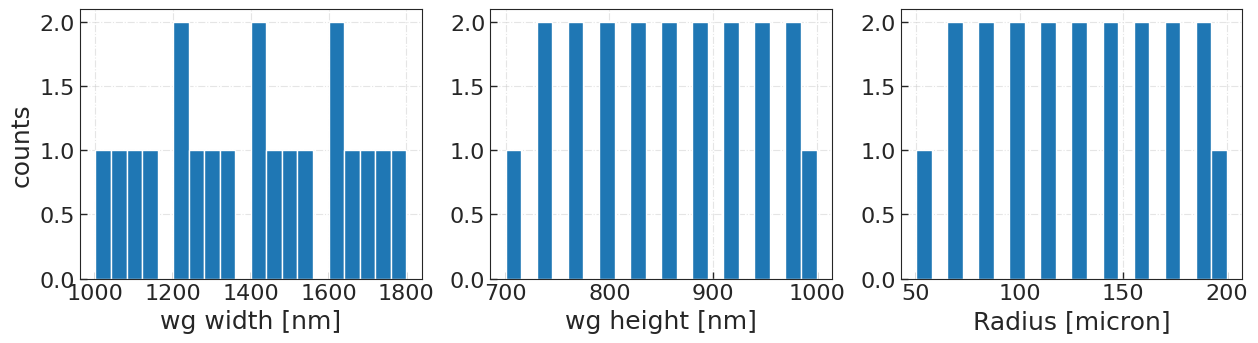

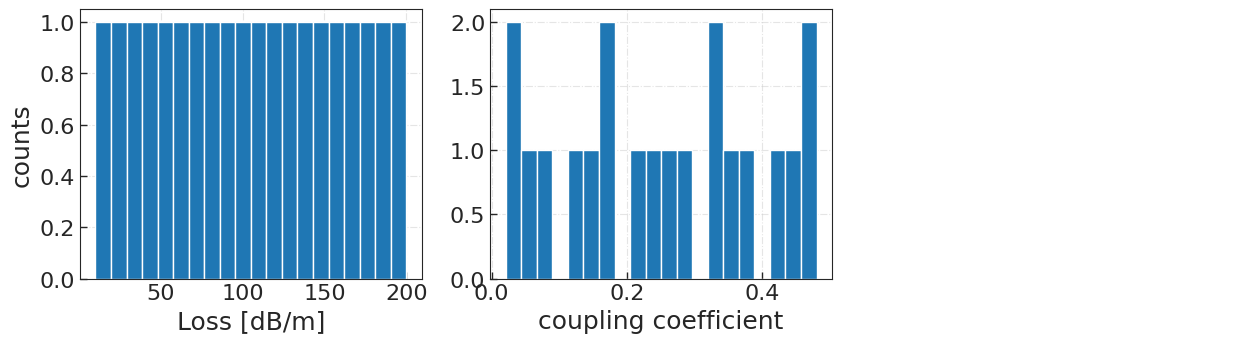

In [ ]:
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})

n_col = 3 # num of columns per row in the figure
for n in np.arange(0, 6, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(15, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            axes[i].hist(df.iloc[:,n], bins = 20)
            axes[i].set_xlabel(df_cols[n], fontsize = 18)
        else:
            axes[i].axis("off")
        n = n+1
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

**Calculating Quality factors and pump threshold for the above suggested samples**

In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import cmath

c=scipy.constants.speed_of_light
h = scipy.constants.hbar

In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Bayesian Optimization and Quantum')

In [ ]:
data = pd.read_excel("Initial sampling_data.xlsx")
print(data.shape)
data.head()

(20, 10)


,sample_no,wg_width [nm],wg_height [nm],Radius [micron],Loss [dB/m],kappa,ng,neff,Aeff,center_WL [nm]
0,0,1800,970,140,60,0.361,2.11458,1.8707,1.33648,1550.84
1,1,1100,850,155,90,0.221,2.14650,1.7990,0.94180,1550.40
2,2,1300,820,110,10,0.281,2.13560,1.8167,0.99400,1550.12
3,3,1400,700,50,30,0.421,2.12860,1.7992,0.96360,1552.40
4,4,1250,940,95,80,0.481,2.13760,1.8311,1.04800,1550.29


In [ ]:
loss = data["Loss [dB/m]"]
loss = loss.to_numpy(dtype='float64')
R = data["Radius [micron]"]
R = R.to_numpy(dtype='float64')
k = data["kappa"]
k = k.to_numpy(dtype='float64')
ng = data["ng"]
ng = ng.to_numpy(dtype='float64')
wl = data["center_WL [nm]"]*10**-9
wl = wl.to_numpy(dtype='float64')
A_eff = data["Aeff"]*10**-12
A_eff = A_eff.to_numpy(dtype='float64')

In [ ]:
L_rt = np.zeros(20)
alpha_wg = np.zeros(20)
A = np.zeros(20)
a = np.zeros(20)
QL = np.zeros(20)
Qc = np.zeros(20)
V_ring = np.zeros(20)
Pth = np.zeros(20)
n2 = 2.5e-19
n = 1.996
for i in range(20):
  L_rt[i] = 2*np.pi*R[i]* 10**-6
  alpha_wg[i] = loss[i]/ (10*np.log10(math.e))  # converted to /m
  A[i] = np.exp(-alpha_wg[i]*L_rt[i]) # round-trip optical power attenuation
  a[i] = np.sqrt(A[i])

  QL[i] = (np.pi*ng[i]*L_rt[i]*np.sqrt(np.sqrt(1-pow(k[i],2))*a[i]))/(wl[i]*(1-(np.sqrt(1-pow(k[i],2))*a[i])))
  Qc[i] = (-np.pi*L_rt[i]*ng[i])/(wl[i]*np.log(np.sqrt(1-pow(k[i], 2))))

  V_ring[i] = A_eff[i]*L_rt[i]
  Pth[i] = (1.54*np.pi/2)*((Qc[i]*np.power(n, 2)*V_ring[i])/(2*np.power(QL[i], 3)*n2*wl[i]))


In [ ]:
omega = np.zeros(20)
Lambda = np.zeros(20)
t = np.zeros(20)
g = np.zeros(20)
V = np.zeros(20)
S = np.zeros(20)

for j in range(20):
  omega[j] = (2*np.pi*c)/wl[j]
  Lambda[j] = (h*np.power(omega[j],2)*c*n2)/(np.power(n, 2)*V_ring[j])
  t[j] = omega[j]/(2*QL[j])
  #P=100e-3
  g[j] = (2*Pth[j]*Lambda[j])/(h*omega[j]*np.power(t[j], 2))
  V[j] = 1+(4*(QL[j]/Qc[j])*g[j]*(2*g[j]-np.sqrt(1+4*np.power(g[j], 2))))
  S[j] = 10*math.log10(V[j])

In [ ]:
# Calculated squeezing level for 20 samples with Pump threshold 100 mW
S

array([-0.41294268, -2.0870171 , -1.54921915, -0.13232953, -0.11714939,
       -0.07494175, -0.13163858, -2.66362099, -0.30745804, -4.01671341,
       -0.73039612, -0.94841364, -1.61453485, -0.65252763, -0.67479403,
       -1.16067713, -1.42905066, -0.64838401, -0.16070238, -1.65628097])

In [ ]:
# Calculated threshold pump power mW for 20 samples
Pth*1000

array([ 6447.81406206,  1100.45213199,  1710.55310977, 20212.2169724 ,
       22822.2644866 ,  8598.8285178 , 20294.95385737,   636.58716756,
        8629.04414348,   400.77448748,  2536.7012237 ,  2293.73235961,
         285.96689233,  4009.07176428,  3726.23947411,  2279.20063517,
         243.61885855,   412.00344857, 16604.75822822,  1570.83484152])

In [ ]:
# Calculated squeezing level for 20 samples with above Pump thresholds
S

array([-10.00335315,  -5.2783503 , -13.69151034, -14.48165481,
       -12.00309289,  -0.07951532, -10.03955691,  -3.8278161 ,
        -7.12073521,  -5.28786862,  -1.30941373,  -2.35603021,
        -1.65091228,  -6.60581704,  -3.8585632 , -11.41500028,
        -1.44653065,  -0.6540933 ,  -8.72056995,  -9.84714418])

In [ ]:
data.insert(10, "QL", QL)
data.insert(11, "Qc", Qc)
data.insert(12, "Pth [W]", Pth)
data.insert(13, "S [dB] - P=100mW", S)
data.insert(14, "S [dB]", S)

In [ ]:
data

,sample_no,wg_width [nm],wg_height [nm],Radius [micron],Loss [dB/m],kappa,ng,neff,Aeff,center_WL [nm],QL,Qc,Pth [W],S [dB] - P=100mW,S [dB]
0,0,1800,970,140,60,0.361,2.11458,1.87070,1.33648,1550.84,49638.093292,5.397128e+04,6.447814,-0.412943,-10.003353
1,1,1100,850,155,90,0.221,2.14650,1.79900,0.94180,1550.40,120578.807906,1.691866e+05,1.100452,-2.087017,-5.278350
2,2,1300,820,110,10,0.281,2.13560,1.81670,0.99400,1550.12,71351.237370,7.273707e+04,1.710553,-1.549219,-13.691510
3,3,1400,700,50,30,0.421,2.12860,1.79920,0.96360,1552.40,13715.148637,1.387333e+04,20.212217,-0.132330,-14.481655
4,4,1250,940,95,80,0.481,2.13760,1.83110,1.04800,1550.29,18849.577253,1.965260e+04,22.822264,-0.117149,-12.003093
5,5,1400,910,110,150,0.021,2.13042,1.84010,1.09340,1550.83,245368.966046,1.352443e+07,8.598829,-0.074942,-0.079515
6,6,1450,760,80,160,0.441,2.12820,1.81680,1.01820,1550.39,18454.311587,2.004601e+04,20.294954,-0.131639,-10.039557
7,7,1200,880,80,120,0.141,2.14091,1.81660,0.99260,1550.25,128393.690257,2.171975e+05,0.636587,-2.663621,-3.827816
8,8,1050,850,125,190,0.381,2.14920,1.79150,0.92730,1549.67,35780.645442,4.363597e+04,8.629044,-0.307458,-7.120735
9,9,1150,790,185,50,0.181,2.14320,1.79460,0.92470,1550.79,216165.984219,3.030198e+05,0.400774,-4.016713,-5.287869


In [ ]:
data.to_csv('initial sample.csv', index=False)